<a href="https://colab.research.google.com/github/RudiksChess/UVG-DataScience-Notas-6-Semestre/blob/main/Lab89/Laboratorio_8_y_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8 y 9 - CNN Caso de estudio 

## Los datos

Usará un subconjunto del Conjunto LendingClub descargado de Kaggle:
https://www.kaggle.com/wordsforthewise/lending-club

## NOTA: No descargue el archivo desde el sitio.  El conjunto de datos que se les ha proveído ya ha sido trabajado y contiene algunas "feature engineering" que debe realizar.  Si usa el archivo original, no podrá seguir esta guía!

LendingClub es una empresa estadounidense de préstamos de tipo peer-to-peer (entre pares), ubicada en San Francisco California.[3] Fue la primera empresa prestamista "peer-to-peer" en registrar su oferta como seguridades ante la Security and Exchange Commission (SEC), y ofrecer intercambio de préstamos en un mercado secundario.  LendingClub es la plataforma de préstamos "peer-to-peer" más grande del mundo.


### El objetivo

Dados los datos históricos de los préstamos realizados, con información de si el cliente pagó o no, se puede realizar un modelo que pueda predecir si un cliente pagará o no el préstamo recibido.  De esta manera, en el futuro cuando llegue un cliente potencial, se puede evaluar si pagará o no el préstamo.  Tenga en mente las métricas de clasificación al evaluar el rendimiento de su modelo!

La columna loan_status es la que contiene la étiqueta



### Vistazo general de los datos

-----
-----

Hay muchos conjuntos de datos de LendingClub en Kaggle.  Esta información corresponde al conjunto de datos que se le ha provisto:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Código de "arranque"

#### Nota: También se provee información de las variables del conjunto como un archivo .csv para que lo pueda consultar desde el NoteBook, si así lo desea:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('https://raw.githubusercontent.com/RudiksChess/UVG-DataScience-Notas-6-Semestre/main/Lab89/lending_club_info.csv',index_col = 'LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Cargar los datos y otras importaciones

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/RudiksChess/UVG-DataScience-Notas-6-Semestre/main/Lab89/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Tareas del Laboratorio

**Complete las tareas abajo indicadas! Tenga en mente que usualmente hay más de una forma de completarlas!**

-----
------

# Sección 1: Análisis Exploratorio de Datos

**OBJETIVO GENERAL: Obtener una idea de cuáles variables son importantes, ver estadístas sumarias y visualizar los datos**


----

**TAREA: Ya que estará intentando predecir el estatus de préstamo, crear una gráfica de conteo, como se muestra abajo.**

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


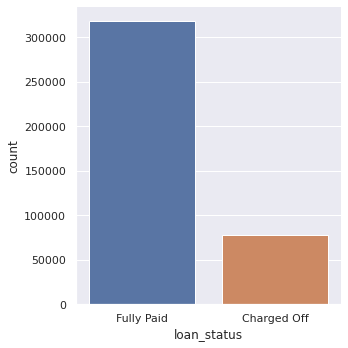

In [10]:
sns.catplot(x="loan_status", kind="count", data=df)

**TAREA: Crear un histograma de la columna loan_amnt.**

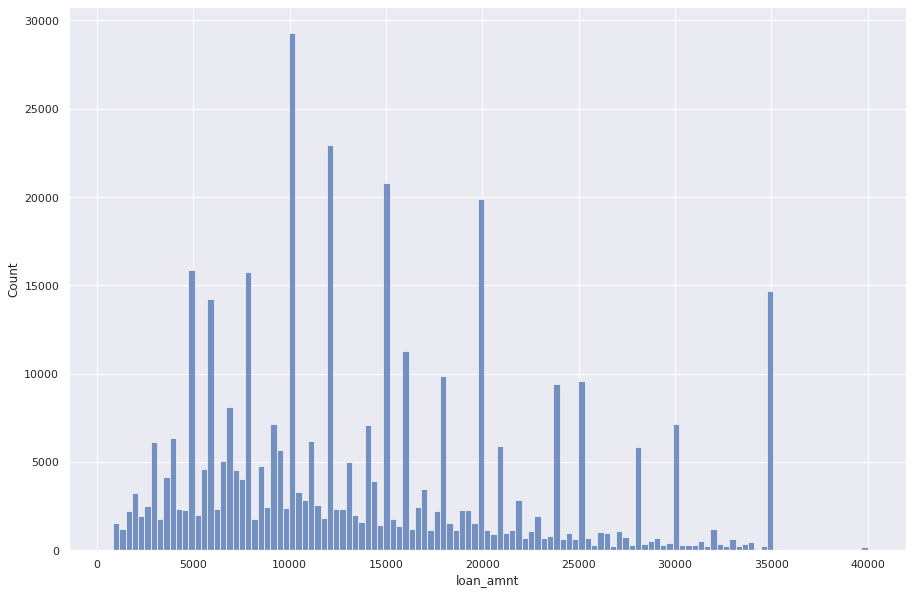

In [11]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df["loan_amnt"],ax=ax)

**TAREA: Explore la correlación entre las variables contínuas.**

In [12]:
corr = df.corr()

In [13]:
corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TAREA: Visualice la tabla anterios utilizando un mapa de calor. Dependiendo de su version de matplotlib, puede que necesite ajustar manualmente el mapap.**

* [Info de mapas de calor](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Ayuda con re-dimensionar](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

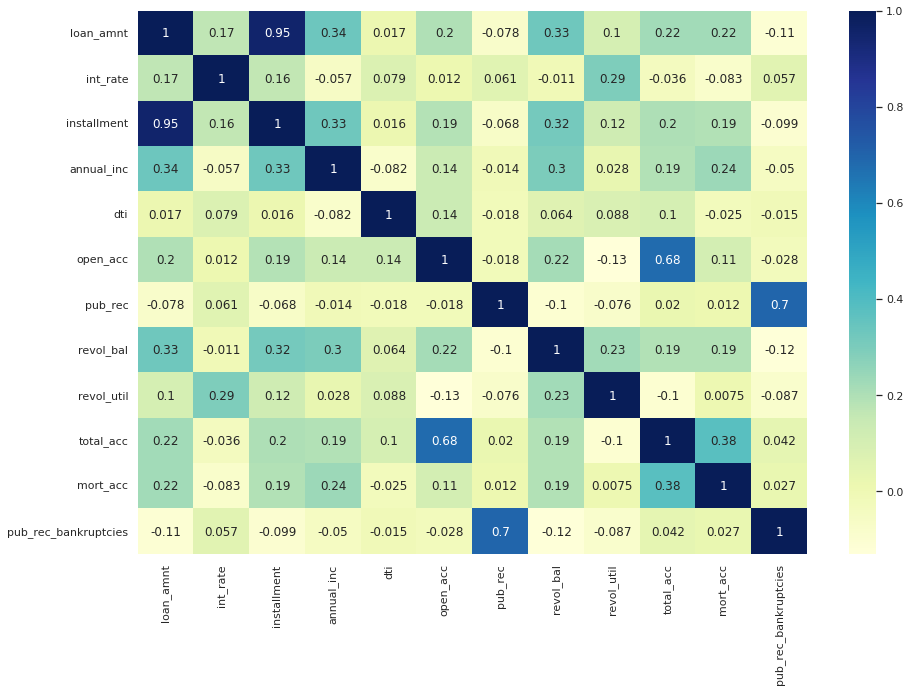

In [14]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, annot=True,cmap="YlGnBu",ax=ax)

**TAREA: Debió haber notado la correlación casi perfecta con la columna "installment". Explore esta columna aún más. Despliegue las descripciones y realice una gráfica de dispersión entre ellas. ¿Será que esta relación tiene sentido? ¿Cree que pueda haber información duplicada aquí?**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


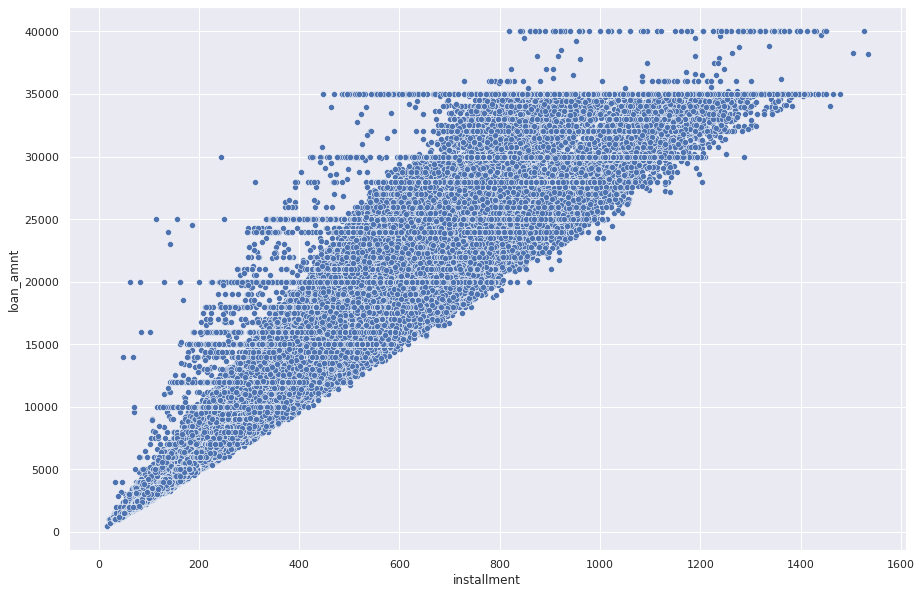

In [17]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="installment",y="loan_amnt", data=df)

**TAREA: Crear una gráfica de caja con bigote (boxplot) que muestre la relación entre loan_status y el monto del préstamo.**

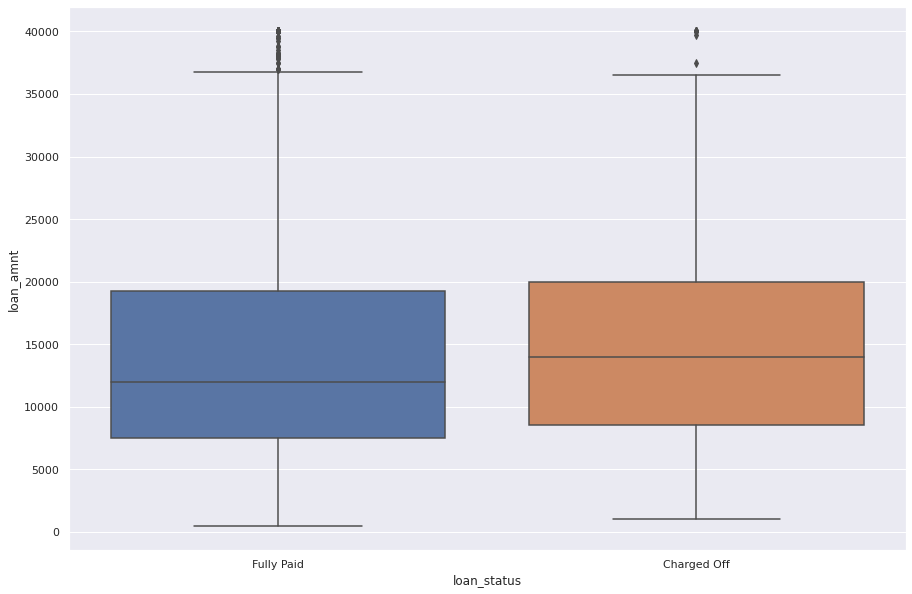

In [18]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="loan_status", y="loan_amnt",data=df)

**TAREA: Calcule las estadísticas sumarias para el monto del préstamo, agrupado por loan_status.**

In [19]:
loan = pd.DataFrame(df[["loan_status","loan_amnt"]])
loan.groupby(by="loan_status").describe()

loan_amnt                             ...                           
                count          mean          std  ...      50%      75%      max
loan_status                                       ...                           
Charged Off   77673.0  15126.300967  8505.090557  ...  14000.0  20000.0  40000.0
Fully Paid   318357.0  13866.878771  8302.319699  ...  12000.0  19225.0  40000.0

[2 rows x 8 columns]

**TAREA: Explore las columnas Grade y SubGrade que LendingClub attribuye a los préstamos. ¿Cuáles son los valores posibles de estas?**

In [20]:
unicos_grade = [i for i in df["grade"].unique()]
unicos_grade

['B', 'A', 'C', 'E', 'D', 'F', 'G']

In [21]:
unicos_subgrade = [i for i in df["sub_grade"].unique()]
unicos_subgrade

['B4',
 'B5',
 'B3',
 'A2',
 'C5',
 'C3',
 'A1',
 'B2',
 'C1',
 'A5',
 'E4',
 'A4',
 'A3',
 'D1',
 'C2',
 'B1',
 'D3',
 'D5',
 'D2',
 'E1',
 'E2',
 'E5',
 'F4',
 'E3',
 'D4',
 'G1',
 'F5',
 'G2',
 'C4',
 'F1',
 'F3',
 'G5',
 'G4',
 'F2',
 'G3']

**TAREA: Crear una gráfica de conteo por grade. Configure el color (hue) con la etiqueta loan_status.**

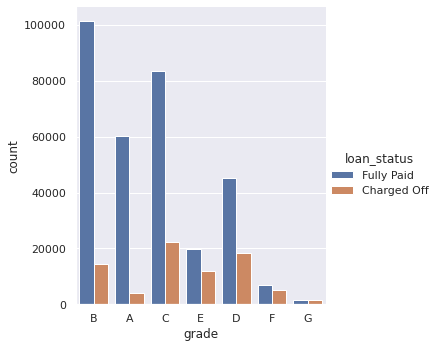

In [22]:
sns.catplot(x="grade", hue="loan_status", kind="count", data=df)

**TAREA: Despliegue una gráfica de conteo por subgrado. Es posible que necesite modificar el tamaño para esta gráfica y [reordenar](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) el eje x. Siéntase libre de editar la paleta de color. Explore ambos los préstamos hechos por subgrado, así como ser separado basado en el estatus del préstamo. Luego de crear esta gráfica, realice una gráfica similar pero configure  hue = "loan_status"**

In [23]:
valores = [i for i in df["sub_grade"].values]
nombres = [i for i in df["sub_grade"].unique()]
nombres.sort()

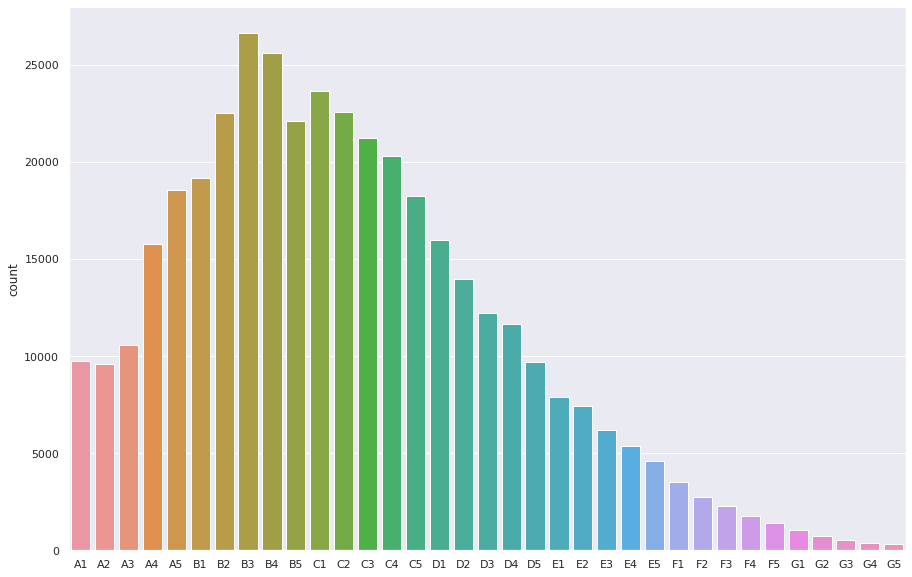

In [24]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=valores,order= nombres, ax=ax)

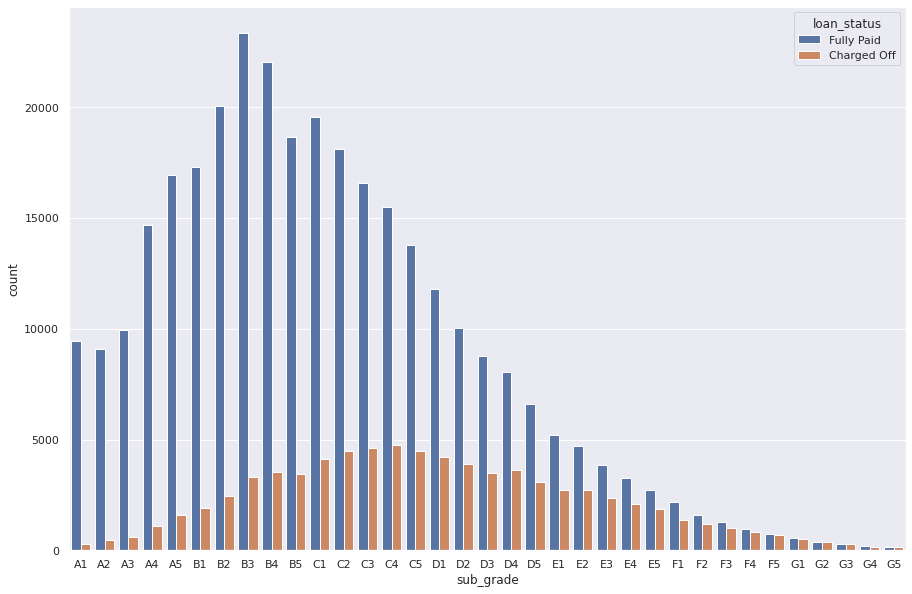

In [25]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="sub_grade",order= nombres, hue="loan_status", ax=ax, data=df)

**TAREA: Parece que los subgrados F y G subgrades no son re-pagados tan frecuentemente.  Aisle esos y vuelva a hacer la gráfica solo con los dos.**

In [26]:
nuevo_subgrade = nombres[nombres.index("F1"):]

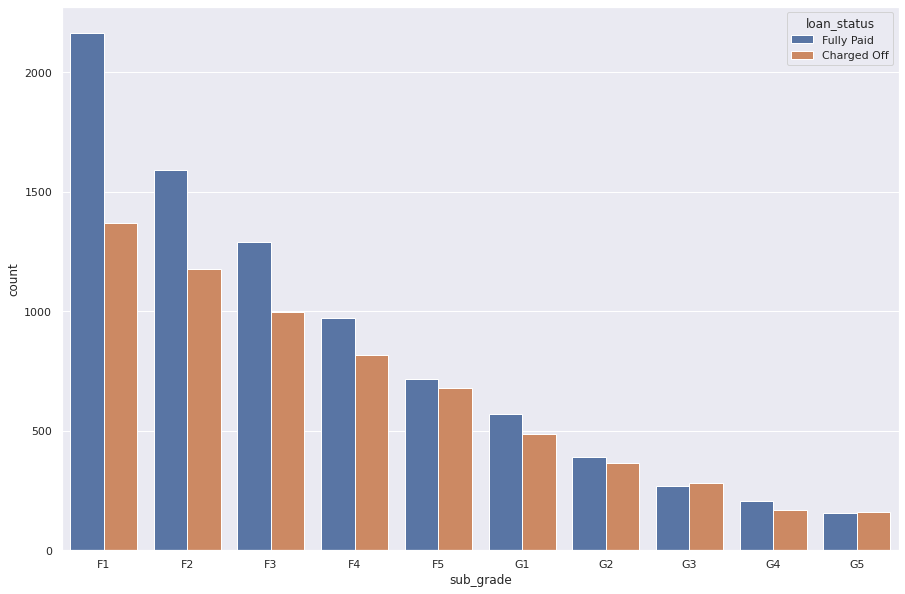

In [27]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="sub_grade",order= nuevo_subgrade, hue="loan_status", ax=ax, data=df)

**TAREA: Crear una nueva columna llamada 'loan_repaid' que contendrá un 1 si el estatus del préstamos fue "Fully Paid" y un 0 si fue "Charged Off".**

In [28]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [29]:
# SU CODIGO AQUI
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off":0})

In [30]:
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**TAREA RETO: (Esto es difícil, pero se puede realizarse en una línea!) Crear una gráfica de barras mostrando la correlación de las variablres numéricas a la columna nueva loan_repaid. [Enlace útil](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [31]:
corr2 = df.corr()
corr2 = pd.DataFrame(corr2["loan_repaid"])
corr2 = corr2.sort_values(["loan_repaid"])
corr2 = corr2[:-1]

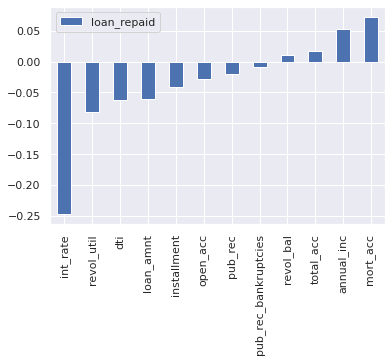

In [32]:
corr2.plot.bar()

---
---
# Section 2: Data PreProcessing

**Objetivo de la sección:  Eliminar o llenar cualquier dato faltante.  Eliminar variables innecesarias o repetitivas.  Convertir variables tipo cadena a variables dummy.**

In [33]:
df.head(6)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1


# Datos Faltantes

**Explore las columnas con datos faltantes.  Se pueden utilizar una variedad de factores para decidir si una variable podría, o no, ser útil y permitir ver si los datos faltantes se deben mantener, desechar o llenar.** 

**TAREA: ¿Cuál es la longitud del dataframe?**

In [34]:
len(df)

396030

**TAREA: Crear una Serie que muestre el conteo total de valoes faltantes, por columna.**

In [35]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TAREA: Convertir esta Serie para que esté en términos del porcentaje del DataFrame total.**

In [36]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TAREA: Examinew emp_title y emp_length para ver si está bien eliminarlas. Imprima la información de esta columnas utilizandola función feat_info() que está al inicio de este notebook.**

In [37]:
feat_info('emp_title')
print("\n")
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TAREA: Cuántos nombres de puestos únicos existen?**

In [38]:
df['emp_title'].describe().unique()[1]

173105

In [39]:
df["emp_title"].value_counts() 

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
Rehabilitation Associates Inc       1
MT(ASCP)BB                          1
Potomac College                     1
Centercode, Inc                     1
Nutrisystem                         1
Name: emp_title, Length: 173105, dtype: int64

**TAREA: Viéndolo realísticamente, hay demasiados nombres de puestos únicos como para tratar de convertirlos a variables dummy. Elimine esa columna.**

In [40]:
df.drop('emp_title', axis=1, inplace=True)

In [41]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**TAREA: Crear una gráfica de conteo de la columna emp_length. Reto: Haga un "sort" por el orden de los valores.**

In [42]:
anios = [i for i in df["emp_length"].unique()]
anios.pop(-1)
anios.sort()
anios

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [43]:
a, b = anios.index('< 1 year'), anios.index('10+ years')
anios[b], anios[a] = anios[a], anios[b]
a, b = anios.index('< 1 year'), anios.index('1 year')
anios[b], anios[a] = anios[a], anios[b]

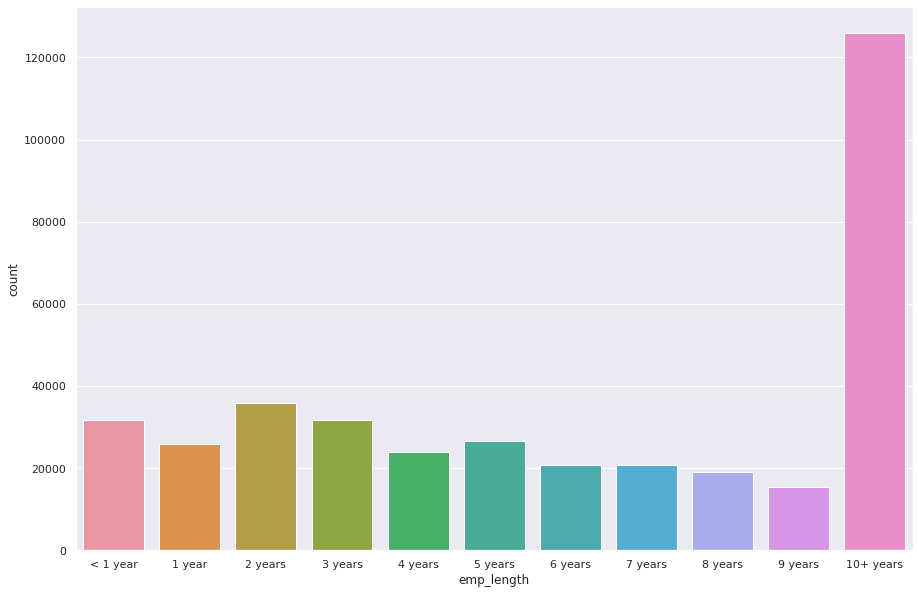

In [44]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="emp_length",order= anios, ax=ax,data=df)

**TAREA: Despliegue la gráfica de conteo con un color (hue) separando Fully Paid vs Charged Off**

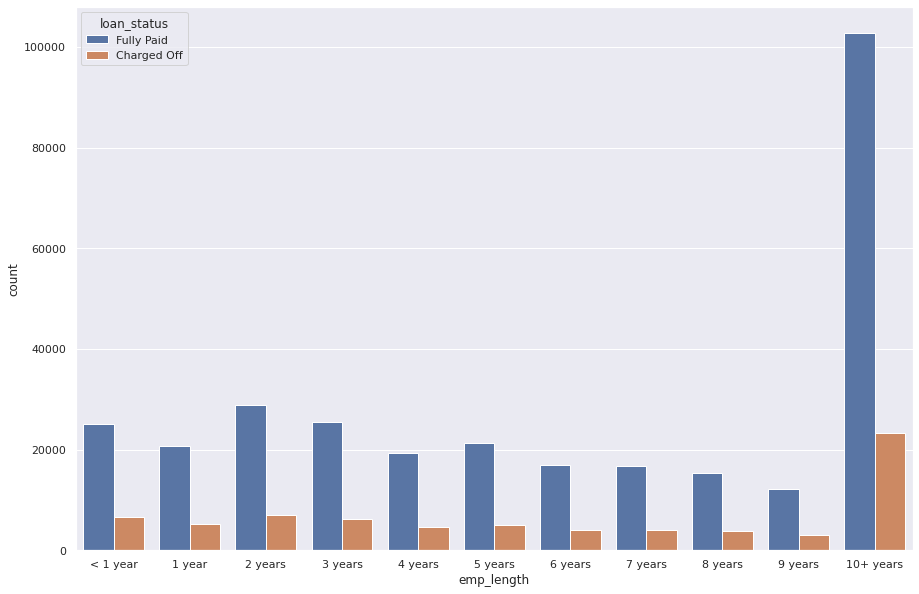

In [45]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="emp_length",order= anios, hue="loan_status", ax=ax,data=df)

**TAREA RETO: Esta gráfica aún no da información sobre si hay una relacióm fuerte entre el tiempo de empleo y estar "charged off". Lo que se quiere es el porcentaje de "charge offs" por categoría. Esencialmente informando qué porcentaje de personas por categoría de empleo no pagaron su préstamo. Hay muchas formas de crear esta serie.  Una vez la haya creado, trate de visualizarla con una [gráfica de barras](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). Esto puede ser algo difícil.**

In [46]:
anios

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [47]:
orden = pd.DataFrame(df[["emp_length","loan_status"]])
orden= orden.groupby(by=["emp_length","loan_status"]).size()
orden = orden.to_frame(name = 'size').reset_index()
orden

,emp_length,loan_status,size
0,1 year,Charged Off,5154
1,1 year,Fully Paid,20728
2,10+ years,Charged Off,23215
3,10+ years,Fully Paid,102826
4,2 years,Charged Off,6924
5,2 years,Fully Paid,28903
6,3 years,Charged Off,6182
7,3 years,Fully Paid,25483
8,4 years,Charged Off,4608
9,4 years,Fully Paid,19344


In [48]:
porcentaje_charged_off = []

for i in anios: 
  charged_off= orden.loc[(orden["emp_length"] == i) & (orden["loan_status"] == "Charged Off")]
  fully_paid= orden.loc[(orden["emp_length"] == i) & (orden["loan_status"] == "Fully Paid")]
  porcentaje = float(charged_off["size"])/float(fully_paid["size"])
  porcentaje_charged_off.append(porcentaje)

In [49]:
porcentajes_finales = pd.DataFrame(list(zip(anios,porcentaje_charged_off)), columns=["emp_length", "porcentaje"])
porcentajes_finales

,emp_length,porcentaje
0,< 1 year,0.260830
1,1 year,0.248649
2,2 years,0.239560
3,3 years,0.242593
4,4 years,0.238213
5,5 years,0.237911
6,6 years,0.233341
7,7 years,0.241887
8,8 years,0.249625
9,9 years,0.250735


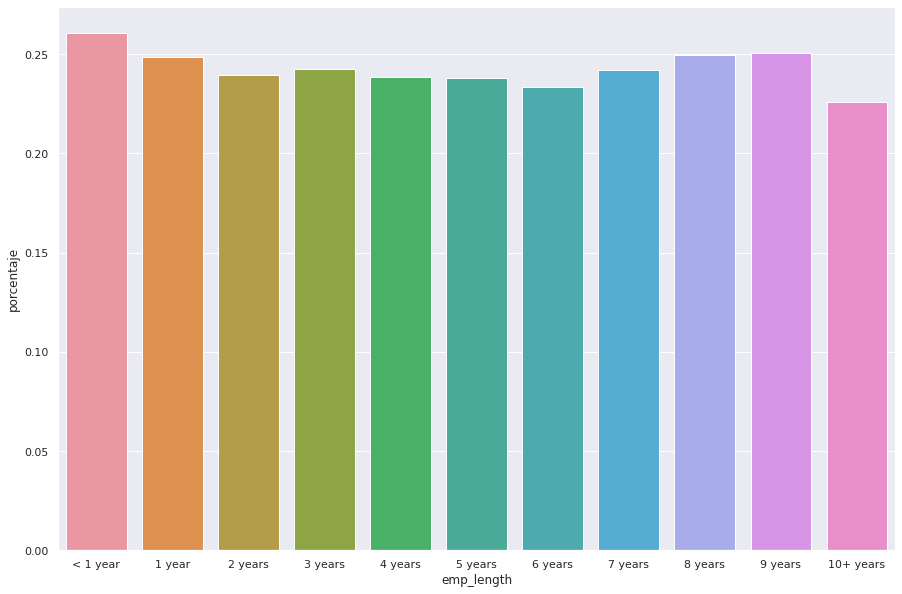

In [50]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="emp_length",y="porcentaje",data=porcentajes_finales)

**TAREA: Las tasas de "Charge off" son extremadamente similares a través de todos los tiempos de empleo. Adelante, elimine la columna emp_length**

In [51]:
df.drop('emp_length', axis=1, inplace=True)

**TAREA: Vuelva a explorar el DataFrame para ver qué columnas aún tiene datos faltantes.**

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TAREA: Revise la columna title vs la columna purpose. ¿Es esta información repetida?**

In [53]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [54]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TAREA: La columna title es simplemente una cadena subcategoría/descripción de la columna purpose. Elimine la columna title.**

In [55]:
df.drop('title', axis=1, inplace=True)

---
**NOTA: Esta es una de las partes más difíciles del laboratorio! Siéntase en libertad de llenar o eliminar los valores faltantesde la columna mort_acc, como se sienta más cómodo! Acá se está siguiendo una línea muy específica.**


---
**TAREA: Averigue qué es lo que representa la columna mort_acc**

In [56]:
feat_info("mort_acc")

Number of mortgage accounts.


**TAREA: Crear un conteo de valores de la columna mort_acc.**

In [57]:
df.groupby("mort_acc")["mort_acc"].count()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
21.0         4
22.0         7
23.0         2
24.0        10
25.0         4
26.0         2
27.0         3
28.0         1
30.0         1
31.0         2
32.0         2
34.0         1
Name: mort_acc, dtype: int64

**TAREA: Hay muchas formas de tratar los datos faltantes. Se podría intentar hacer un modelo simple para llenarlos, tal como un modelo lineal, que las llene basado en la media de las otras columnas, o se podrían encasillar las columnas en categorías y fijar el NaN como una de las categorías.  No existe un método 100% correcto!  Veamos las otras columnas para ver cuál(es) se correlacionan altamente a mort_acc**

In [58]:
corr["mort_acc"]

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

**TAREA: Parece que la columna total_acc tiene correlación con la columna mort_acc , esto tiene sentido! Pruebe esta metodología fillna(). Agrupe el dataframe por la columna total_acc y calcule la media para mort_acc por cada instancia de total_acc. Para obtener los resultados de abajo:**

In [59]:
t_acc = df.groupby("total_acc")["mort_acc"].mean().reset_index()
t_acc

,total_acc,mort_acc
0,2.0,0.000000
1,3.0,0.052023
2,4.0,0.066743
3,5.0,0.103289
4,6.0,0.151293
...,...,...
113,124.0,1.000000
114,129.0,1.000000
115,135.0,3.000000
116,150.0,2.000000


**TAREA RETO: Llene los valores faltantes de la columna mort_acc basados en su valor de total_acc. Si falta el valor de mort_acc, entonces lléne ese valor faltante con la media correspondiente a su valor total_acc de la Series que se creo arriba. Esto requiere usar el método .apply() con dos columnas. Vea el enlace de abajo para tener más información.**

[Enlace de ayuda](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [60]:
df["mort_acc"] = df.apply(lambda x: t_acc.loc[t_acc["total_acc"]==x["total_acc"]]["mort_acc"].values[0] if pd.isnull(x["mort_acc"]) else x["mort_acc"] ,axis=1)

In [61]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TAREA: revol_util y pub_rec_bankruptcies tienen datos faltantes, pero estos son menos del  0.5% de todos los datos. Elimine las filas que tienen esos datos faltantes con dropna().**

In [62]:
df.dropna(how='any', inplace=True)

In [63]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Variables Categóricas y  Variables Dummy

**Con lo anterior ya quedó resuelto lo de los datos faltantes! Ahora solo falta ver cómo manejar los valores cadena debido a las columnas categóricas.**

**TAREA: Liste todas las columnas no numérias. [Enlace de ayuda](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Otra llamada de método muy útil](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [64]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Ahora a revisar todas las variables cadena para ver qué hacer con ellas.**

---


### columna term

**TAREA: Convierta la columna term a un dato entero de 36 o 60 utilizadndo .apply() or .map().**

In [65]:
df["term"]=df["term"].map({" 36 months":36, " 60 months":60})

In [66]:
df.groupby(["term"])["term"].count()

term
36    301247
60     93972
Name: term, dtype: int64

### columna grade

**TAREA: Ya sabemos que grade es parte de sub_grade, así que solo elimine la columna grade.**

In [67]:
df.drop('grade', axis=1, inplace=True)

**TAREA: Convierta la columna subgrade a variables dummy. Concatene estas nuevas columnas al dataframe original. Recuerde botar la columna subgrade original y de agregar drop_first = True a su llamada get_dummies.**

In [68]:
df = pd.concat([df.drop('sub_grade', axis=1), pd.get_dummies(df['sub_grade'])], axis=1)

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

### verification_status, application_type, initial_list_status, purpose 
**TAREA: Convierta estas columnas: ['verification_status', 'application_type', 'initial_list_status', 'purpose'] a variables dummy y concaténelas con del dataframe original. Recuerde poner drop_first = True y eliminar las columnas originales.**

In [70]:
df = pd.concat([df.drop('verification_status', axis=1), pd.get_dummies(df['verification_status'])], axis=1)
df = pd.concat([df.drop('application_type', axis=1), pd.get_dummies(df['application_type'])], axis=1)
df = pd.concat([df.drop('purpose', axis=1), pd.get_dummies(df['purpose'])], axis=1)
df = pd.concat([df.drop('initial_list_status', axis=1), pd.get_dummies(df['initial_list_status'])], axis=1)

### home_ownership
**TAREA: Revise los conteos de los valores de la columna home_ownership column.**

In [71]:
home_ownership= df.groupby("home_ownership")["loan_amnt"].count().reset_index()
home_ownership

,home_ownership,loan_amnt
0,ANY,3
1,MORTGAGE,198022
2,NONE,29
3,OTHER,110
4,OWN,37660
5,RENT,159395


**TAREA: Convertir estos a variables dummy, pero [reemplace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE y ANY con OTHER, de tal forma que queden solo 4 categorías, MORTGAGE, RENT, OWN, OTHER. Luego concaténelas con el dataframe original. Recuerde usar drop_first = True y eliminar las columnas originales.**

In [72]:
df["home_ownership"]=df["home_ownership"].map({"ANY":"OTHER", "NONE":"OTHER", "MORTGAGE":"MORTGAGE","OTHER":"OTHER", "OWN":"OWN", "RENT":"RENT"})

In [73]:
home_ownership= df.groupby("home_ownership")["loan_amnt"].count().reset_index()
home_ownership

,home_ownership,loan_amnt
0,MORTGAGE,198022
1,OTHER,142
2,OWN,37660
3,RENT,159395


In [74]:
df = pd.concat([df.drop('home_ownership', axis=1), pd.get_dummies(df['home_ownership'])], axis=1)

### address
**TAREA: Cree (hacer feature engineering) una columna de código postal "zip code" a partir de la columna address.**

In [75]:
direccion= df["address"].values
direccion = [i for i in direccion]
zip_codes = []

for i in direccion: 
  zip_code = i.split(" ")[-1]
  zip_codes.append(zip_code)

zip_codes = [int(i) for i in zip_codes]


In [76]:
df["zip_code"] = zip_codes

In [77]:
df[["zip_code","address"]]
df= df.reset_index(drop=True)

**TAREA: Convierta la columna de código postal en variables dummy usando pandas. Concatene el resultado y elimine la columna original zip_code así como la columna address.**

In [78]:
df.drop('address', axis=1, inplace=True)

In [79]:
df = pd.concat([df.drop('zip_code', axis=1), pd.get_dummies(df['zip_code'])], axis=1)

### issue_d 

**TAREA: Esto sería fuga de datos, no se sabría de antemano si un prestamo fue, o no fue, otorgado al usar el modelo así que en teoría no existiría esta fecha, elimine esta columna.**

In [80]:
df["issue_d"]

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
395214    Oct-2015
395215    Feb-2015
395216    Oct-2013
395217    Aug-2012
395218    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [81]:
df.drop('issue_d', axis=1, inplace=True)

### earliest_cr_line
**TAREA: Esta parece ser una fecha histórica.  Extraiga el año de esta columna utilizando una función  .apply, luego conviértala a un tipo numérico. Póngale de nombre a esta column 'earliest_cr_year'.  Luego elimine la columna earliest_cr_line.**

In [82]:
fechas= pd.DatetimeIndex(df['earliest_cr_line']).year
fechas = [i for i in fechas]
df.drop('earliest_cr_line', axis=1, inplace=True)
df["earliest_cr_year"]= fechas

In [83]:
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,...,G3,G4,G5,Not Verified,Source Verified,Verified,DIRECT_PAY,INDIVIDUAL,JOINT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,f,w,MORTGAGE,OTHER,OWN,RENT,813,5113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.000000,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2004
395215,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2006
395216,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1997
395217,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1990


## División Train/Test

**TAREA: Importe train_test_split de sklearn.**

In [84]:
from sklearn.model_selection import train_test_split

**TAREA: elimine la columna load_status que se creo antes, ya que es una duplicación de la columna loan_repaid. Se usará la columna loan_repaid ya que ya está en 0s y 1s.**

In [85]:
df.drop('loan_status', axis=1, inplace=True)

**TAREA: Establezca las variables X e y.**

In [86]:
X=df.drop('loan_repaid',axis=1)
y= df['loan_repaid']

----
----

# OPCIONAL

## Obtener una muestra (Sample) para la hora de entrenar

### OPCIONAL: Use .sample() para obtener una muestrade las 490k+ observaciones para ahorrar tiempo en el entrenamiento. Esto es altamente recomendado para computadoras con poco RAM o si no tiene un GPU.  

### OJO!  Al hacer esto no se puede esperar el mismo rendimiento que si se utilizan todas las observaciones.

----
----

In [87]:
#df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TAREA: Realice una división train/test con test_size = 0.2 y un random_state de 101.**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [89]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,...,G3,G4,G5,Not Verified,Source Verified,Verified,DIRECT_PAY,INDIVIDUAL,JOINT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,f,w,MORTGAGE,OTHER,OWN,RENT,813,5113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.000000,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2004
395215,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2006
395216,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1997
395217,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1990


## Normalización de los datos

**TAREA: Use MinMaxScaler para normalizar los datos de X_train y X_test. Recuerde que no se desea tener una fuga de datos del conjunto de prueba por lo que el ajuste se hace solamente con los datos de X_train.**

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
escalador = MinMaxScaler()

In [92]:
escalador.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [93]:
X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

# Crear el modelo

**TAREA: Ejecute la celda de abajo para importar las funciones necesarias de Keras.**

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TAREA: Construya un modelo secuencial a entrenar con los datos. Acá hay opciones ilimitadas pero esta es una sugerencia: un modelo que vaya 78 --> 39 --> 19--> 1 neurona de salida. OPCIONAL: Explore la posibilidad de agregar** [Capas Dropout](https://keras.io/layers/core/)

[1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) 

[2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)

In [95]:
# SU CODIGO AQUI
model = Sequential()

# Seleccione el número de capas y neuronas (unidades) que desea.
model.add(Dense(units = 78, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 39, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 19, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))


# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Recuerde que hay que compilar - compile()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

**TAREA: Ajuste el modelo a los datos de entrenamiento para un número mínimo de 25 epocas. También agregue los datos de validación para hacer gráficas más tarde. Opcional: agregue un tamaño de tandas de (batch_size) de 256.**

In [96]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 25,
          validation_data = (X_test, y_test), verbose=1,
          batch_size = 256
          )

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3252 - accuracy: 0.8653 - val_loss: 0.2644 - val_accuracy: 0.8870
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2710 - accuracy: 0.8874 - val_loss: 0.2631 - val_accuracy: 0.8869
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2672 - accuracy: 0.8877 - val_loss: 0.2632 - val_accuracy: 0.8869
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2655 - accuracy: 0.8876 - val_loss: 0.2638 - val_accuracy: 0.8869
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2643 - accuracy: 0.8877 - val_loss: 0.2629 - val_accuracy: 0.8869
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2639 - accuracy: 0.8876 - val_loss: 0.2637 - val_accuracy: 0.8869
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2639 - accuracy: 0.8877 - val_loss: 0.2638 - val_accuracy:

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 78)                6708      
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 39)                3081      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                760       
_________________________________________________________________
dropout_2 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

# Sección 3: Evaluar el rendimiento del modelo.

**TAREA: Grafique la pérdida de validación versus la pérdida de entrenamiento.**

In [98]:
perdidas = pd.DataFrame(model.history.history)
perdidas

,loss,accuracy,val_loss,val_accuracy
0,0.325238,0.865312,0.264377,0.886987
1,0.271028,0.887420,0.263080,0.886911
2,0.267243,0.887705,0.263214,0.886936
3,0.265526,0.887556,0.263834,0.886924
4,0.264266,0.887654,0.262903,0.886924
5,0.263930,0.887638,0.263748,0.886924
6,0.263865,0.887701,0.263816,0.886924
7,0.263290,0.887771,0.262392,0.886924
8,0.263192,0.887771,0.262308,0.886924
9,0.262931,0.888106,0.262076,0.886924


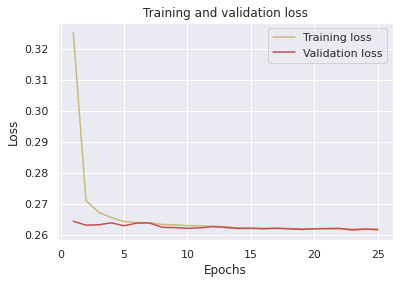

In [99]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**TAREA: Crear predicciones a partir de conjunto de datos X_test y muestre un reporte de clasificación y matriz de confusión para este conjunto de datos.**

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

predicciones = model.predict(X_test)
predicciones = np.round(predicciones ).astype(int)

In [101]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [102]:
print(confusion_matrix(y_test, predicciones))

[[ 6720  8938]
 [    0 63386]]


**TAREA: Dado el cliente indicado abajo, ¿le ofrecería un préstamo?**

In [103]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

nuevo_cliente = df.drop('loan_repaid', axis=1).iloc[random_ind]
nuevo_cliente_temporal = nuevo_cliente
nuevo_cliente = np.array(nuevo_cliente)

In [104]:
nuevo_cliente=nuevo_cliente.reshape((1,85))

In [105]:
nuevo_cliente.shape

(1, 85)

In [106]:
cliente=model.predict(nuevo_cliente)
cliente

array([[1.]], dtype=float32)

Sí, sí le ofrecería un préstamos. 

**TAREA: Ahora revise los datos originales, ¿Pagó este cliente su préstamo?**

In [107]:
df.iloc[random_ind]["loan_repaid"]

1.0

Sí, los datos coinciden. 

# FIN!